<a ><img src="Pictures/trashpanda.png"  width="70" align="left"> </a>
<div style="text-align: right"> <h3><span style="color:gray"> DRAFT </span> </h3> </div>

<br>
<br>
<br>

<a ><img src="Pictures/Icon.png" Width="250" align="center"> </a>

<br>
<br>



<h1><center>News Scraper for Sentiment Analysis</center></h1>
<h2><center> <span style="font-weight:normal"><font color='#022F73'> Allocation of News with Impact on German Financial Markets </font>  </span></center></h2>


<h3><center><font color='gray'>JONAS GOTTAL</font></center></h3>

<h4>About this Notebook</h4>
This will be the foundation for the Sentiment Analysis with VADER  <br> 
(Valence Aware Dictionary for Sentiment Reasoning) and pysentiment.<br>  Therefore we will need a time series of Financial News (Headlines).
<br>
<br>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="text-decoration:none; margin-top: 30px; background-color:#F2F2F2; border-color:#022F73">
    <span style="color:#022F73">
    <ol>
      <li><a href="#1"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Motivation  </span> </a></li>
      <li><a href="#2"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Limit the universe of News outlets</span> </a></li>
      <li><a href="#3"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >HTML Parsing</span> </a></li>
      <li><a href="#4"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Combined Database</span> </a></li>
      <li><a href="#5"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Upload on MySQL</span> </a></li>
    </ol>
    </span>
</div>

In [1]:
#!pip install html5lib
#!pip install ipython-sql
import requests
from   bs4 import BeautifulSoup
import html5lib
import time
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import dtale
import sqlalchemy
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()
import csv

# 1. Motivation <a id="1"></a>


> <i> "There are three ways to make a living in this business: be first, be smarter, or cheat. Well, I don't cheat. And although I like to think we have some pretty smart people here in this room, it sure is a hell of lot easier to just be first." </i> **- Margin Call** 

But to be the first to use market data, you would need to be in an optimal physical location (depending on the stock exchanges) and you have to have the fastest connection. Neither of those is true for me and many others. So to be successful - in this analogy of margin call - you would have to design/manipulate a unique set of data - and therefore be first again.

# 2. Limit the universe of News outlets <a id="2"></a>

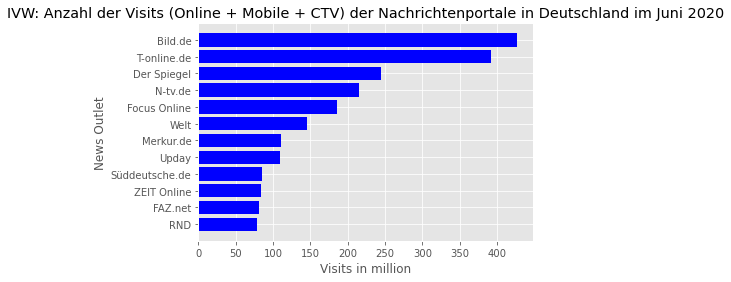

In [2]:

%matplotlib inline
plt.style.use('ggplot')

x = ['Bild.de', 'T-online.de', 'Der Spiegel' ,'N-tv.de', 'Focus Online', 'Welt', 'Merkur.de', 'Upday', 'Süddeutsche.de' ,'ZEIT Online', 'FAZ.net', 'RND']
News = [427.04,392.24,245.08,215.58,185.81,145.42,110.82,109.8,84.77,84.39,81.18,77.91]
x.reverse()
News.reverse()



x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, News, color='blue')
plt.ylabel("News Outlet")
plt.xlabel("Visits in million")
plt.title("IVW: Anzahl der Visits (Online + Mobile + CTV) der Nachrichtenportale in Deutschland im Juni 2020")

plt.yticks(x_pos, x)

plt.show()

Quelle: Informationsgemeinschaft zur Feststellung der Verbreitung von Werbeträgern e.V. (IVW)

> <i>Deutsche Aktienbesitzer sind im Mittel männlich, um die 40 Jahre alt, haben einen Hochschulabschluss und verdienen monatlich mindestens 4.000 Euro netto. Zu diesen Erkenntnissen kommen die Autoren einer Studie von Comdirect, Consorsbank und ING Deutschland. Für die zum vierten Mal in Folge gemeinschaftlich durchgeführte Studie hat das Marktforschungsinstitut Toluna im Juli und August 2020 insgesamt 2.000 Deutsche ab 18 Jahren online befragt. </i>  — Die Studie ist Teil einer gemeinsamen Initiative der drei Geldinstitute mit dem programmatischen Titel „Aktion pro Aktie“.



## Reduction of Newsoutlets, that most likely fit the target group and have a larger impact
(Highly subjective)

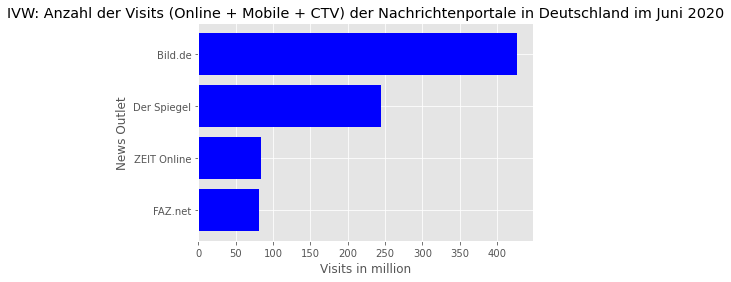

In [3]:

%matplotlib inline
plt.style.use('ggplot')

x = ['Bild.de', 'Der Spiegel' ,'ZEIT Online', 'FAZ.net']
News = [427.04,245.08,84.39,81.18]
x.reverse()
News.reverse()



x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, News, color='blue')
plt.ylabel("News Outlet")
plt.xlabel("Visits in million")
plt.title("IVW: Anzahl der Visits (Online + Mobile + CTV) der Nachrichtenportale in Deutschland im Juni 2020")

plt.yticks(x_pos, x)

plt.show()

## Additional International News Outlets with significant Impact on german Markets

### BBC 
https://www.bbc.com


### CNN 
https://www.cnn.com


### CNBC
https://www.cnbc.com/technology


### NY Times
https://www.nytimes.com/

# 3. HTML Parsing <a id="3"></a>

#### Documentation: https://requests.readthedocs.io/en/master/user/advanced
```j
content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))
`````


## A. Bild

In [4]:
url = "https://www.bild.de/politik/international/bild-international/home-44225950.bild.html"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [5]:
bild = BeautifulSoup(content.content, 'html.parser')

headlines = bild.find_all(attrs={'class':'headline'})

df_bild = pd.DataFrame([i.text for i in headlines], columns=["bild"])
print (df_bild.size, df_bild.head())

12                                                 bild
0                  Bill Gates on conspiracy theories
1               “Run! The planes are bombing again!”
2                             Church bombed to ruins
3  „The city looks like German cities during the ...
4          Navalny: Sanction Putin's closest circle 


## B. Spiegel

In [6]:
url = "https://www.spiegel.de/international/"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [7]:
spiegel = BeautifulSoup(content.content, 'html.parser')

headlines = spiegel.find_all(attrs={'class':'align-middle'})

df_spiegel = pd.DataFrame([i.text for i in headlines], columns=["spiegel"])
print (df_spiegel.size, df_spiegel.head())

27                                              spiegel
0  A Model African Country Slides Toward Dictator...
1                      “How Can You Not Be Worried?”
2  EU Border Agency Frontex Complicit in Greek Re...
3             If That's the Future, then Good Night!
4             "There Will Be Unrest, Dead Civilians"


## C. Zeit

In [8]:
url = "https://www.zeit.de/english/index"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [9]:
zeit = BeautifulSoup(content.content, 'html.parser')

headlines = zeit.find_all(attrs={'class':'zon-teaser-standard__title'})

df_zeit = pd.DataFrame([i.text for i in headlines], columns=["zeit"])
print (df_zeit.size, df_zeit.head())

20                                                 zeit
0                                   "It's Up To Us" 
1                   The Nightmare Has Become Reality
2  "Food Becomes Increasingly Important the More ...
3                  Exorcism in Lieu of Enlightenment
4                     "None of Us Want to Be Killed"


## D. FAZ

In [10]:
url = "https://www.faz.net/english/"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [11]:
faz = BeautifulSoup(content.content, 'html.parser')

headlines = faz.find_all(attrs={'class':'tsr-Base_HeadlineText'})

df_faz = pd.DataFrame([i.text for i in headlines], columns=["faz"]).replace("\n", "", regex=True).replace("\t", "", regex=True)
print (df_faz.size, df_faz.head())

20                                                  faz
0  „We have to fight misinformation because peopl...
1                  Do not ruin the Internet!        
2                              The Black Axe        
3  Time for a German-British Friendship Treaty   ...
4                 The Girl With The Red Coat        


## E. BBC

In [12]:
url = "https://www.bbc.com/news"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [13]:
bbc = BeautifulSoup(content.content, 'html.parser')

headlines = bbc.find_all('h3')

df_bbc = pd.DataFrame([i.text for i in headlines], columns=["bbc"])
print (df_bbc.size, df_bbc.head())

59                                                  bbc
0  Biden hits out at Trump over handling of pandemic
1  Biden hits out at Trump over handling of pandemic
2   Belgian doctors with Covid asked to keep working
3       Water on the Moon could sustain a lunar base
4   The Countdown: I am young and this is why I vote


## F. CNN

In [14]:
url = "https://www.cnn.com/business"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [15]:
cnn = BeautifulSoup(content.content, 'html.parser')

headlines = cnn.find_all(attrs={'class': 'cd__headline'})

df_cnn = pd.DataFrame([i.text for i in headlines], columns=["cnn"])
print (df_cnn.size, df_cnn.head())

35                                                  cnn
0  Trump promised to fix what he calls an unfair ...
1  Stocks post steep losses on surging Covid-19 c...
2  Jack Ma's Ant Group raises $34 billion in worl...
3  China says it will impose sanctions on Boeing ...
4  Want something delivered by Christmas? Order w...


## G. CNBC

In [16]:
url = "https://www.cnbc.com"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [17]:
cnbc = BeautifulSoup(content.content, 'html.parser')

headlines = cnbc.find_all(attrs={'class':'Card-title'})

df_cnbc = pd.DataFrame([i.text for i in headlines], columns=["cnbc"])
print (df_cnbc.size, df_cnbc.head())

34                                                 cnbc
0  Stocks making the biggest moves after hours: T...
1  Stock market turbulence could last until the e...
2  Dow closes 650 points lower, posts worst day s...
3  Stock market live Monday: Dow slides 600, VIX ...
4  Coronavirus updates: U.S. cases hit daily reco...


## H. New York Times

Due to its sound reputation we will also use the sub sections and not only the main site.

In [18]:
overview = requests.get('https://www.nytimes.com/')
subs = BeautifulSoup(overview.content, 'html.parser')
sections = subs.find_all(attrs={"class":"css-1wjnrbv"})
nyt = [[i.text, i['href']] for i in sections]
df_nyt = pd.DataFrame(nyt, columns=["heads","links"]).drop_duplicates()

In [19]:
df_nyt.head(11)

,heads,links
0,World,https://www.nytimes.com/section/world
1,U.S.,https://www.nytimes.com/section/us
2,Politics,https://www.nytimes.com/section/politics
3,N.Y.,https://www.nytimes.com/section/nyregion
4,Business,https://www.nytimes.com/section/business
5,Opinion,https://www.nytimes.com/section/opinion
6,Tech,https://www.nytimes.com/section/technology
7,Science,https://www.nytimes.com/section/science
8,Health,https://www.nytimes.com/section/health
9,Sports,https://www.nytimes.com/section/sports


For us relevant: 
- World https://www.nytimes.com/section/world
- Politics https://www.nytimes.com/section/politics
- Business https://www.nytimes.com/section/business
- Tech https://www.nytimes.com/section/technology

In [20]:
url = "https://www.nytimes.com/section/world"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [21]:
nyt_w = BeautifulSoup(content.content, 'html.parser')

headlines = nyt_w.find_all(name="h2")

df_nyt_w = pd.DataFrame([i.text for i in headlines], columns=["nyt_w"]).iloc[1:].reset_index(drop=True)
print (df_nyt_w.size, df_nyt_w.head())

44                                                nyt_w
0  A Teacher, His Killer and the Failure of Frenc...
1  China Aims to End Extreme Poverty, but Covid-1...
2  Women on Qatar Airways Flight Strip-Searched, ...
3  Cage Match or P.R. Opportunity? Boris Johnson ...
4  With Vacation Rentals Empty, European Cities S...


In [22]:
url = "https://www.nytimes.com/section/politics"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [23]:
nyt_p = BeautifulSoup(content.content, 'html.parser')

headlines = nyt_p.find_all(name="h2")

df_nyt_p = pd.DataFrame([i.text for i in headlines], columns=["nyt_p"]).iloc[1:].reset_index(drop=True)
print (df_nyt_p.size, df_nyt_p.head())

18                                                nyt_p
0  The Two Americas Financing the Trump and Biden...
1  Democrats in Many Races Are Moderates. Republi...
2  Infection of Pence Aides Raises New Questions ...
3  Georgia, Once Reliably Red, Is Suddenly a Batt...
4  Rallies Are the Core of Trump’s Campaign, and ...


In [24]:
url = "https://www.nytimes.com/section/business"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [25]:
nyt_b = BeautifulSoup(content.content, 'html.parser')

headlines = nyt_b.find_all(name="h2")

df_nyt_b = pd.DataFrame([i.text for i in headlines], columns=["nyt_b"]).iloc[1:].reset_index(drop=True)
print (df_nyt_b.size, df_nyt_b.head())

34                                                nyt_b
0  Ant Group Set to Raise $34 Billion in World’s ...
1    Stocks Slide as Virus Cases Surge: Live Updates
2  How the Virus Slowed the Booming Wind Energy B...
3      All About Ant Group, the Next Big Tech I.P.O.
4  Kazakhstan, Reversing Itself, Embraces ‘Borat’...


In [26]:
url = "https://www.nytimes.com/section/technology"

content = requests.get(url = url, headers = {'Accept': 'text/html'}, timeout=(3, 27))

content.status_code

200

In [27]:
nyt_t = BeautifulSoup(content.content, 'html.parser')

headlines = nyt_t.find_all(name="h2")

df_nyt_t = pd.DataFrame([i.text for i in headlines], columns=["nyt_t"]).iloc[1:].reset_index(drop=True)
print (df_nyt_t.size, df_nyt_t.head())

23                                                nyt_t
0  Ant Challenged Beijing and Prospered. Now It T...
1      All About Ant Group, the Next Big Tech I.P.O.
2  Schools Clamored for Seesaw’s App. That Was Go...
3              Driverless Cars Go Humble to Get Real
4                                Personal Technology


# 4. Combined Database <a id="4"></a>

In [28]:
Database = pd.concat([df_bild, df_spiegel, df_zeit, df_faz, df_bbc, df_cnn, df_cnbc, df_nyt_w, df_nyt_p, df_nyt_b, df_nyt_t], axis=1, sort=False)

In [29]:
n = pd.to_datetime('now')
n

Timestamp('2020-10-26 22:18:54.064912')

##### Lets add a Timestamp so we can use the Headlines as Timeseries

In [30]:
Database['Timestamp']= n

In [31]:
Database.head()

,bild,spiegel,zeit,faz,bbc,cnn,cnbc,nyt_w,nyt_p,nyt_b,nyt_t,Timestamp
0,Bill Gates on conspiracy theories,A Model African Country Slides Toward Dictator...,"""It's Up To Us""",„We have to fight misinformation because peopl...,Biden hits out at Trump over handling of pandemic,Trump promised to fix what he calls an unfair ...,Stocks making the biggest moves after hours: T...,"A Teacher, His Killer and the Failure of Frenc...",The Two Americas Financing the Trump and Biden...,Ant Group Set to Raise $34 Billion in World’s ...,Ant Challenged Beijing and Prospered. Now It T...,2020-10-26 22:18:54.064912
1,“Run! The planes are bombing again!”,“How Can You Not Be Worried?”,The Nightmare Has Become Reality,Do not ruin the Internet!,Biden hits out at Trump over handling of pandemic,Stocks post steep losses on surging Covid-19 c...,Stock market turbulence could last until the e...,"China Aims to End Extreme Poverty, but Covid-1...",Democrats in Many Races Are Moderates. Republi...,Stocks Slide as Virus Cases Surge: Live Updates,"All About Ant Group, the Next Big Tech I.P.O.",2020-10-26 22:18:54.064912
2,Church bombed to ruins,EU Border Agency Frontex Complicit in Greek Re...,"""Food Becomes Increasingly Important the More ...",The Black Axe,Belgian doctors with Covid asked to keep working,Jack Ma's Ant Group raises $34 billion in worl...,"Dow closes 650 points lower, posts worst day s...","Women on Qatar Airways Flight Strip-Searched, ...",Infection of Pence Aides Raises New Questions ...,How the Virus Slowed the Booming Wind Energy B...,Schools Clamored for Seesaw’s App. That Was Go...,2020-10-26 22:18:54.064912
3,„The city looks like German cities during the ...,"If That's the Future, then Good Night!",Exorcism in Lieu of Enlightenment,Time for a German-British Friendship Treaty ...,Water on the Moon could sustain a lunar base,China says it will impose sanctions on Boeing ...,"Stock market live Monday: Dow slides 600, VIX ...",Cage Match or P.R. Opportunity? Boris Johnson ...,"Georgia, Once Reliably Red, Is Suddenly a Batt...","All About Ant Group, the Next Big Tech I.P.O.",Driverless Cars Go Humble to Get Real,2020-10-26 22:18:54.064912
4,Navalny: Sanction Putin's closest circle,"""There Will Be Unrest, Dead Civilians""","""None of Us Want to Be Killed""",The Girl With The Red Coat,The Countdown: I am young and this is why I vote,Want something delivered by Christmas? Order w...,Coronavirus updates: U.S. cases hit daily reco...,"With Vacation Rentals Empty, European Cities S...","Rallies Are the Core of Trump’s Campaign, and ...","Kazakhstan, Reversing Itself, Embraces ‘Borat’...",Personal Technology,2020-10-26 22:18:54.064912


In [32]:
d = dtale.show(Database)
d

# 5. Upload on a free MySQL DB <a id="5"></a>

In [35]:
############### CONFIGURE THIS ###################
# Open database connection

# Credentials to database connection
user = 'sql7372795'
passw = 'tbd'
host =  'sql7.freemysqlhosting.net'
database = 'sql7372795'


# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=host, db=database, user=user, pw=passw))

In [36]:
Database.columns = Database.columns.astype(str)

In [37]:
Database.to_sql('database', engine, if_exists = 'replace', index=False)

# Thank you for completing this Notebook!

<hr>
<h5>
<p> <center>  <font color='gray'> Jupyter Notebook by </font> Jonas Gottal </center></p>
</h5>